# Tarea 01 - Yuneri Pérez Arellano - 199813

En las primeras clases del curso estaremos trabajando en desarrollar buenas
prácticas para construir productos de datos. La parte conceptual como la
parte de programación son igualmente importantes. Para poder bajar las ideas
a la práctica necesitamos una muestra de código.

## Contexto:

* Supon que estamos trabajando en una start up de bienes raices y necesitamos
construir un producto de datos que ayude a soportar una aplicación para 
que nuestros clientes (compradores/vendedores) puedan consultar una estimación
del valor de una propiedad de bienes raíces.

* Aún el CEO no tiene claro como debe de diseñarse esta aplicación. Nostros
como data scientists debemos proponer una Prueba de Concepto, que permita
experimentar rápido, dar un look an feel de la experiencia y nos permita
fallar rápido para probar una siguiente iteración.

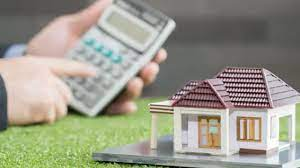

## Objetivo:

* Prototipa un modelo en Python que permita estimar el precio de una casa
dadas algunas características que el usuario deberá proporcionar a través de
un front al momento de la inferencia.

## Datos:

* En vista de que el CEO no tiene mucha claridad, podemos construir un dataset
  con dato sintéticos o tomar alguno otro como referencia, para poder 
  desarrollar nuestra idea.

* Para lo cual usaremos el [conjunto de precios de compra-venta de casas de la
  ciudad Ames, Iowa en Estados Unidos](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

## Entregable

* Un notebook o notebooks que puedas presentar, desarrollando todos los 
pasos que seguiste para construir tu modelo.

* Recuerda incluir la ingeniería de características, la selección de variabales,
el entrenamiento del modelo, la evaluación del ajuste y un ejemplo de como se
ejecutaran las inferencias.

## Out of scope

* Desarrollar una herramienta, API, etc.

Para el desarrollo de este proyecto se seguirá lo siguiente:

## Machine Learning Project Checklist

Checklist para proyectos de aprendizaje automático:
1. Plantee el problema y observe el panorama general.
2. Obtenga los datos.
3. Explore los datos para obtener información.
4. Prepare los datos para exponer mejor los patrones de datos subyacentes al aprendizaje automático.
5. Explore modelos diferentes y seleccione los mejores.
6. Ajusta tus modelos y combínalos en una gran solución.
7. Presente su solución.
8. Inicie, supervise y mantenga su sistema.

### La base contiene la siguiente información:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

### Se considerará el conjunto de precios de compra-venta de casa en la ciudad Ames, Iowa en Estados Unidos para el desarrollo de este prodcto de datos.

In [72]:
# Se importan las librerias necesarias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [73]:
# Se guardan las bases 
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [74]:
# Se unen las bases
df = pd.concat([df_train, df_test], axis = 0)
pd.set_option('display.max_columns', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# Análisis Exploratorio de Datos (EDA)

In [75]:
# Porcentajes de variables con faltantes
pd.set_option('display.max_rows', None)
df.isnull().sum().sort_values(ascending = False)*100/len(df)

PoolQC           99.657417
MiscFeature      96.402878
Alley            93.216855
Fence            80.438506
SalePrice        49.982871
FireplaceQu      48.646797
LotFrontage      16.649538
GarageFinish      5.447071
GarageQual        5.447071
GarageCond        5.447071
GarageYrBlt       5.447071
GarageType        5.378554
BsmtExposure      2.809181
BsmtCond          2.809181
BsmtQual          2.774923
BsmtFinType2      2.740665
BsmtFinType1      2.706406
MasVnrType        0.822199
MasVnrArea        0.787941
MSZoning          0.137033
Functional        0.068517
BsmtHalfBath      0.068517
BsmtFullBath      0.068517
Utilities         0.068517
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
SaleType          0.034258
Electrical        0.034258
GarageCars        0.034258
TotalBsmtSF       0.034258
GarageArea        0.034258
Exterior2nd       0.034258
Exterior1st       0.034258
KitchenQual       0.034258
BsmtUnfSF         0.034258
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
S

In [76]:
# Se eliminan las columnas que contienen más del 60% de valores nulos
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1)

In [77]:
# Checamos las columnas vacías 
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
df[missing_data_cols].head()

,MSZoning,LotFrontage,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SaleType,SalePrice
0,RL,65.0,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,WD,208500.0
1,RL,80.0,AllPub,MetalSd,MetalSd,None,0.0,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,SBrkr,0.0,1.0,TA,Typ,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,WD,181500.0
2,RL,68.0,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,WD,223500.0
3,RL,60.0,AllPub,Wd Sdng,Wd Shng,None,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,SBrkr,1.0,0.0,Gd,Typ,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,WD,140000.0
4,RL,84.0,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,WD,250000.0


In [78]:
# Revisamos todas las variables disponibles y el tipo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## Ingeniería de Características

In [79]:
# Codificaremos las variables categoricas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col].astype(str))

In [80]:
# Se eliminaran filas y columas duplicadas
df = df.drop_duplicates()
df = df.reset_index(drop = True)

In [81]:
# Se definen columnas categoricas y numericas de la base de datos
categorical_cols = ['MSZoning',
'Street',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'SaleType',
'SaleCondition']

bool_cols = []

numeric_cols = ['MSSubClass',
'LotFrontage',
'LotArea',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'GarageYrBlt',
'GarageCars',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'MoSold',
'YrSold',
'SalePrice']


In [82]:
# Completamos las variables vacías usando un imputador y definiendo una función para esto

from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis = 1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator = RandomForestRegressor(random_state = 123), add_indicator = True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

    rf_classifier = RandomForestRegressor()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = r2_score(y_test, y_pred)

    print("La variable '"+ passed_col+ "' fue imputada con", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state = 123), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


In [83]:
# Revisamos los valores vacíos antes de emplear las funciones antes creadas 
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtFullBath       2
BsmtHalfBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64

In [84]:
import warnings
warnings.filterwarnings('ignore')

# Imputamos informacioón en valores vacíos con nuestras funciones
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values MSZoning : 0.0%
La variable 'MSZoning' fue imputada con 52.06 accuracy

Missing Values LotFrontage : 16.65%
MAE = 8.28464065708419 

RMSE = 13.380591939711941 

R2 = 0.6203769557444452 

Missing Values Utilities : 0.0%
La variable 'Utilities' fue imputada con -2.06 accuracy

Missing Values Exterior1st : 0.0%
La variable 'Exterior1st' fue imputada con 68.64 accuracy

Missing Values Exterior2nd : 0.0%
La variable 'Exterior2nd' fue imputada con 74.05 accuracy

Missing Values MasVnrType : 0.0%
La variable 'MasVnrType' fue imputada con 59.02 accuracy

Missing Values MasVnrArea : 0.79%
MAE = 46.05751724137931 

RMSE = 102.32713707718882 

R2 = 0.6821729588840453 

Missing Values BsmtQual : 0.0%
La variable 'BsmtQual' fue imputada con 66.12 accuracy

Missing Values BsmtCond : 0.0%
La variable 'BsmtCond' fue imputada con 15.1 accuracy

Missing Values BsmtExposure : 0.0%
La variable 'BsmtExposure' fue imputada con 46.64 accuracy

Missing Values BsmtFinType1 : 0.0%
La variable 'Bs

In [85]:
# Nos aseguramos que todos los valores vacíos se hayan imputado
df.isnull().sum().sort_values(ascending = False)

Id               0
HalfBath         0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
FullBath         0
HeatingQC        0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
TotalBsmtSF      0
Utilities        0
LandContour      0
LotShape    

## Selección de variables para el modelo de predicción

In [86]:
# Elaboramos estadísticas descriptivas para la base de datos
descriptive_stats = df.describe(include='all')
descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.500,1460.0,2189.500,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.000,50.0,70.000,190.0
MSZoning,2919.0,3.030490,0.662386,0.0,3.000,3.0,3.000,5.0
LotFrontage,2919.0,70.120185,22.971145,21.0,60.000,70.0,80.215,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.000,9453.0,11570.000,215245.0
Street,2919.0,0.995889,0.063996,0.0,1.000,1.0,1.000,1.0
LotShape,2919.0,1.947585,1.409721,0.0,0.000,3.0,3.000,3.0
LandContour,2919.0,2.776978,0.704391,0.0,3.000,3.0,3.000,3.0
Utilities,2919.0,0.001713,0.055510,0.0,0.000,0.0,0.000,2.0
LotConfig,2919.0,3.055841,1.604472,0.0,2.000,4.0,4.000,4.0


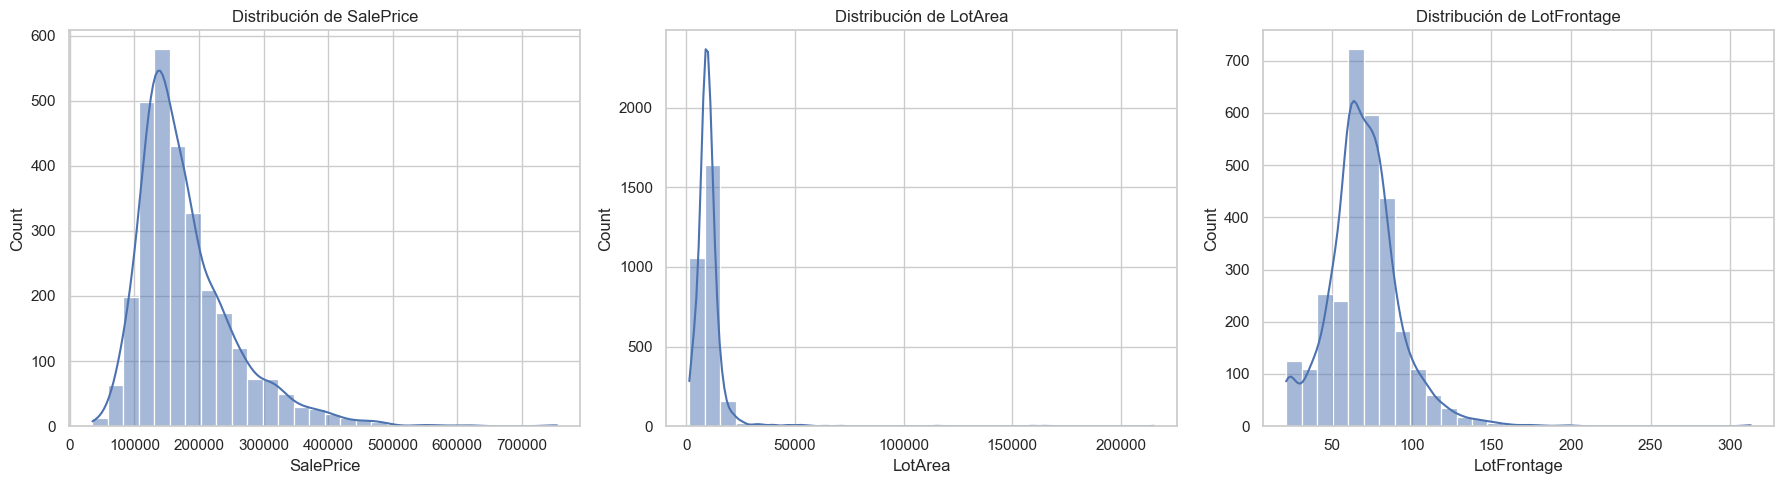

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
fig, axes = plt.subplots(1, 3, figsize = (18, 5))

# Mostramos graficos de distribución para las siguientes variables:

# SalePrice
sns.histplot(df['SalePrice'], bins = 30, ax = axes[0], kde = True)
axes[0].set_title('Distribución de SalePrice')

# LotArea
sns.histplot(df['LotArea'], bins = 30, ax = axes[1], kde = True)
axes[1].set_title('Distribución de LotArea')

# LotFrontage
sns.histplot(df['LotFrontage'], bins = 30, ax = axes[2], kde = True)
axes[2].set_title('Distribución de LotFrontage')

plt.tight_layout()
plt.show()

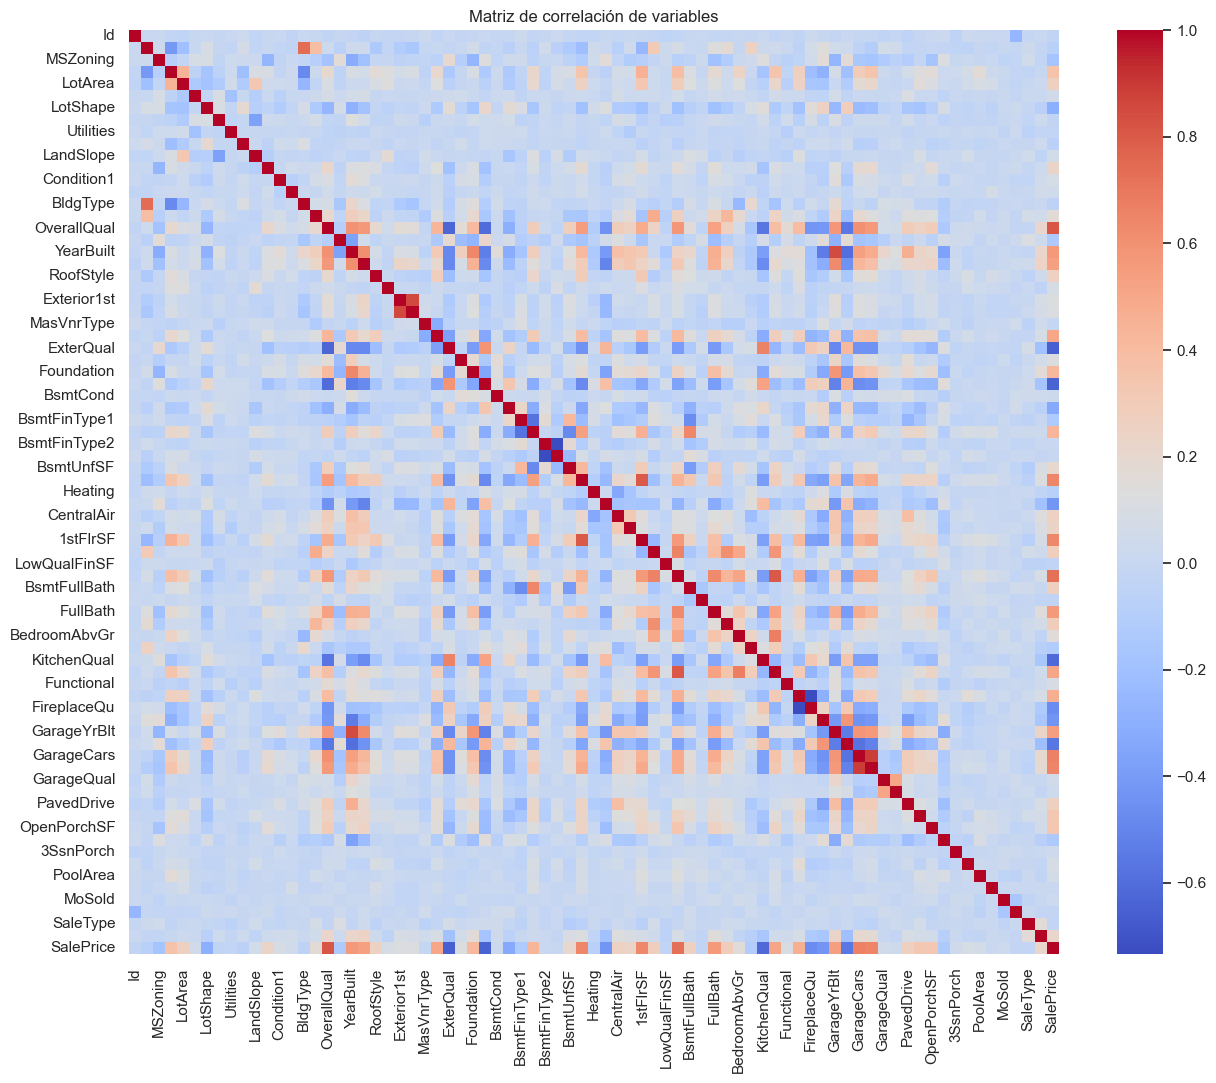

SalePrice        1.000000
OverallQual      0.816523
GrLivArea        0.723580
GarageCars       0.661788
GarageArea       0.650300
TotalBsmtSF      0.645755
1stFlrSF         0.634758
YearBuilt        0.565979
FullBath         0.563861
GarageYrBlt      0.543763
YearRemodAdd     0.534838
TotRmsAbvGrd     0.519016
MasVnrArea       0.511140
Fireplaces       0.471412
BsmtFinSF1       0.435576
Foundation       0.411786
LotFrontage      0.361616
OpenPorchSF      0.330438
WoodDeckSF       0.326118
HalfBath         0.288405
2ndFlrSF         0.276712
LotArea          0.268372
PavedDrive       0.265469
BsmtFullBath     0.264534
RoofStyle        0.260189
CentralAir       0.257110
Electrical       0.231372
Neighborhood     0.229376
SaleCondition    0.215048
BsmtUnfSF        0.197477
HouseStyle       0.171227
BedroomAbvGr     0.155182
ExterCond        0.125263
Exterior1st      0.124045
Exterior2nd      0.118941
Functional       0.101303
RoofMatl         0.088635
ScreenPorch      0.086848
Condition1  

In [88]:
# Analisis de Correlación
correlation_matrix = df.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot = False, cmap = 'coolwarm')
plt.title('Matriz de correlación de variables')
plt.show()

# Se muestran las correlaciones con el SalePrice en orden descendente
correlation_with_saleprice = correlation_matrix['SalePrice'].sort_values(ascending = False)
correlation_with_saleprice

## Selección de variables

In [44]:
#df = df[['Id','SalePrice','OverallQual','GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 
#        'YearBuilt', 'FullBath', 'GarageYrBlt', 'YearRemodAdd', 'TotRmsAbvGrd', 'MasVnrArea', 
#        'Fireplaces', 'BsmtFinSF1', 'Foundation']]

In [89]:
df = df[['Id','SalePrice','OverallQual','GrLivArea', 
         'GarageCars', 'GarageArea', 'ExterQual', 'BsmtQual']]


## Entrenamiento del modelo

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

# Cargamos la base con las variables seleccionadas para el modelo de predicción
data = df

# Preprocesamiento
numerical_cols = data.select_dtypes(include=['int64', 'float64']).drop('SalePrice', axis = 1).columns
categorical_cols = data.select_dtypes(include=['object']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown = 'ignore')

preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Se definen distintos modelos para evaluar el que mejor se comporte a los requerimientos del producto de datos
model_dict = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Support Vector Machine Regression': SVR(),
    'XGBoost Regression': xgb.XGBRegressor(),
    'GB Regressor': GradientBoostingRegressor(),
    'Ada Boost Regression': AdaBoostRegressor()
}

# División de base de datos
X = data.drop('SalePrice', axis = 1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

# Se crean pipelines
pipelines = {name: Pipeline(steps=[('preprocessor', preprocessor), ('model', model)]) for name, model in model_dict.items()}

# Entrenamiento y evaluación de los modelos
rmse_results = {}

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_results[name] = rmse

# Se muestran los RMSE resultantes
rmse_results_sorted = dict(sorted(rmse_results.items(), key = lambda item: item[1]))
print(rmse_results_sorted)


{'Random Forest Regression': 25108.89526082993, 'GB Regressor': 25161.749272818357, 'XGBoost Regression': 28898.82918996482, 'Linear Regression': 29009.458053031907, 'Ada Boost Regression': 32988.16714542543, 'Decision Tree Regression': 37869.455749262284, 'Support Vector Machine Regression': 79175.80499763683}


In [96]:
import pandas as pd
import joblib

# Se dividen las bases
df_train = df[df['Id'].isin(df_train['Id'])]
df_test = df[df['Id'].isin(df_test['Id'])]


# Preparando las bases X_train y y_train
X_train = df_train.drop(['SalePrice'], axis = 1)  # Variables dependientes
y_train = df_train['SalePrice']  # Variable objetivo

# Se entrena con el XGBoost Regressor
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)

# Se hace la predicción en la base test usando el modelo entrenado
y_pred = rfr_model.predict(df_test.drop(['SalePrice'], axis = 1))

joblib.dump(rfr_model, "./rfr_model.joblib")

['./rfr_model.joblib']

## Predicción

In [99]:
descriptive_stats = df.describe(include='all')
descriptive_stats.T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.500,1460.0,2189.5,2919.0
SalePrice,2919.0,179747.953210,75827.801630,34900.0,129331.795,160000.0,214000.0,755000.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.000,6.0,7.0,10.0
GrLivArea,2919.0,1500.759849,506.051045,334.0,1126.000,1444.0,1743.5,5642.0
GarageCars,2919.0,1.766077,0.762060,0.0,1.000,2.0,2.0,5.0
GarageArea,2919.0,472.730284,215.498949,0.0,320.000,480.0,576.0,1488.0
ExterQual,2919.0,2.530661,0.702245,0.0,2.000,3.0,3.0,3.0
BsmtQual,2919.0,2.288112,0.922771,0.0,2.000,2.0,3.0,4.0


In [102]:
df.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,ExterQual,BsmtQual
0,1,208500.0,7,1710,2.0,548.0,2,2
1,2,181500.0,6,1262,2.0,460.0,3,2
2,3,223500.0,7,1786,2.0,608.0,2,2
3,4,140000.0,7,1717,3.0,642.0,3,3
4,5,250000.0,8,2198,3.0,836.0,2,2


In [106]:

# Definir las características necesarias para la predicción
feature_columns = ['Id','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'ExterQual', 'BsmtQual']

Id = 3000
# Solicitar al usuario ingresar los valores de las variables
print("Ingrese los valores de las variables para predecir el precio de la casa:")
overall_qual = float(input("OverallQual - Calidad general de materiales y acabados (valor entre 1 y 10): "))
grliv_area = float(input("GrLivArea - Superficie habitable sobre el nivel del suelo (suelo) en pies cuadrados: "))
garage_cars = float(input("GarageCars - Tamaño del garaje en capacidad de coches: "))
garage_area = float(input("GarageArea - Tamaño del garaje en pies cuadrados: "))
exter_qual = input("ExterQual - Calidad de los materiales exteriores (valor entre 0 y 3): ")  
bsmt_qual = input("BsmtQual - Altura del sótano (valor entre 0 y 4): ")  

user_input = pd.DataFrame({
    'Id': [Id],
    'OverallQual': [overall_qual],
    'GrLivArea': [grliv_area],
    'GarageCars': [garage_cars],
    'GarageArea': [garage_area],
    'ExterQual': [exter_qual],
    'BsmtQual': [bsmt_qual]
})

# Crear un DataFrame con las características ingresadas por el usuario
input_data = pd.DataFrame(user_input, columns = feature_columns)

# Cargar el modelo previamente entrenado
loaded_rfr = joblib.load("./rfr_model.joblib")

# Realizar la predicción
prediction = loaded_rfr.predict(input_data)

# Mostrar el resultado
print(f'El precio estimado de la casa es: {prediction[0]:.2f}')


#Id  SalePrice    OverallQual	GrLivArea	GarageCars	GarageArea	ExterQual	BsmtQual
#01  208500.0          7	      1710	        2.0	        548.0	     2	        2


Ingrese los valores de las variables para predecir el precio de la casa:
OverallQual - Calidad general de materiales y acabados (valor entre 1 y 10): 7
GrLivArea - Superficie habitable sobre el nivel del suelo (suelo) en pies cuadrados: 1710
GarageCars - Tamaño del garaje en capacidad de coches: 2
GarageArea - Tamaño del garaje en pies cuadrados: 548
ExterQual - Calidad de los materiales exteriores (valor entre 0 y 3): 2
BsmtQual - Altura del sótano (valor entre 0 y 4): 2
El precio estimado de la casa es: 208526.90


### Se deja un ejemplo de la predicción.